In [1]:
cd  /Users/driscoll/Documents/GitHub/fnc/matlab
FNC_init

[**Demo %s**](#demo-diffmats-2nd)

We test first-order and second-order differentiation matrices for the function $x + \exp(\sin 4x)$ over $[-1,1]$.

In [2]:
f = @(x) x + exp(sin(4*x));

For reference, here are the exact first and second derivatives.

In [3]:
df_dx = @(x) 1 + 4 * exp(sin(4*x)) .* cos(4*x);
d2f_dx2 = @(x) 4 * exp(sin(4*x)) .* (4*cos(4*x).^2 - 4*sin(4*x));

We discretize on equally spaced nodes and evaluate $f$ at the nodes.

In [4]:
[t, Dx, Dxx] = diffmat2(12, [-1 1]);
y = f(t);

Then the first two derivatives of $f$ each require one matrix-vector multiplication.

In [5]:
yx = Dx * y;
yxx = Dxx * y;

The results show poor accuracy for this small value of $n$.

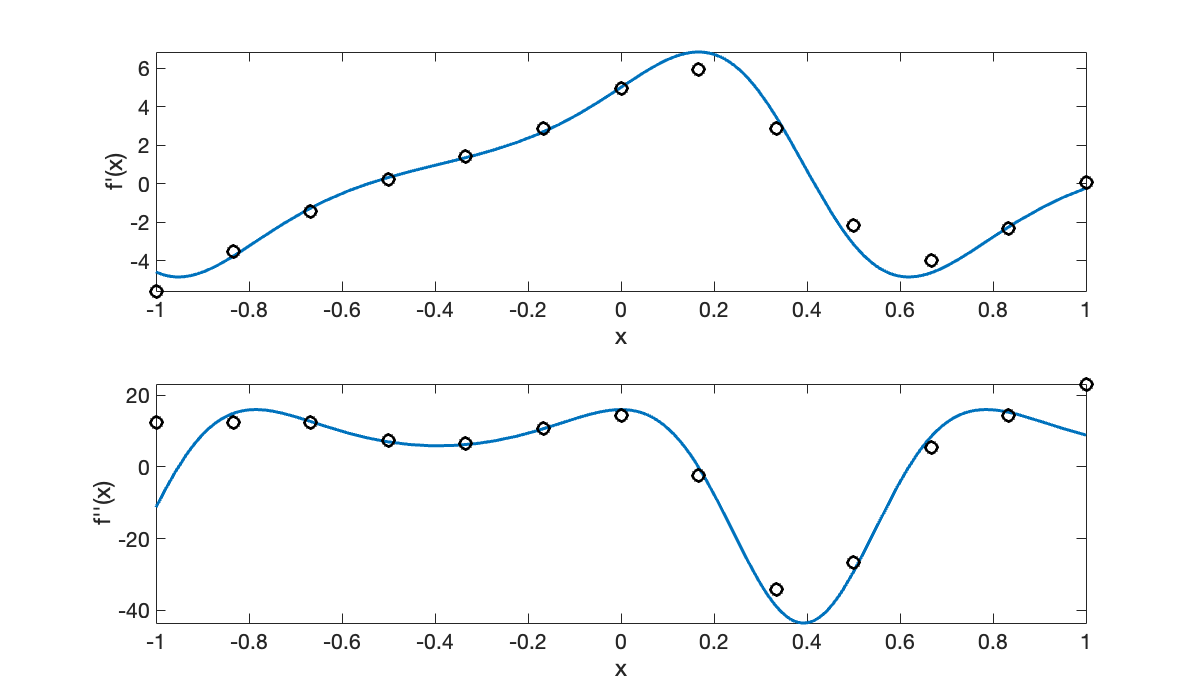

In [6]:
clf,  subplot(2, 1, 1)
fplot(df_dx, [-1, 1]),  hold on
plot(t, yx, 'ko')
xlabel('x'),  ylabel('f''(x)')
subplot(2, 1, 2)
fplot(d2f_dx2, [-1, 1]),  hold on
plot(t, yxx, 'ko')
xlabel('x'),  ylabel('f''''(x)')

An convergence experiment confirms the order of accuracy. Because we expect an algebraic convergence rate, we use a log-log plot of the errors.

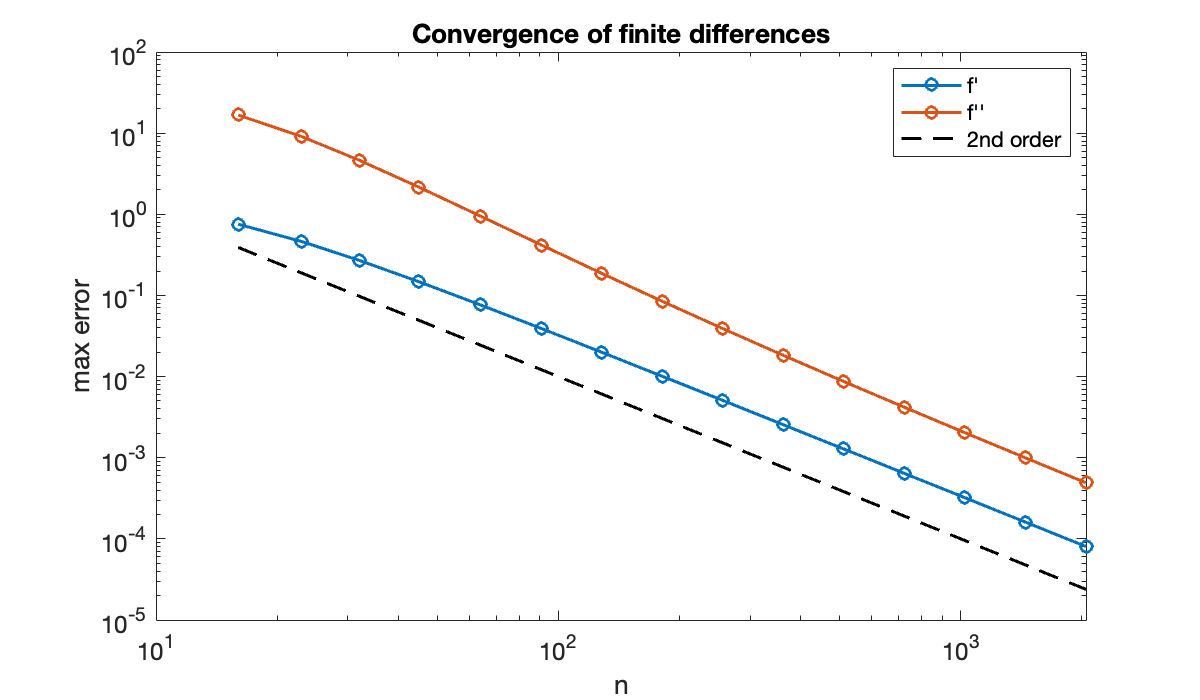

In [7]:
n = round( 2 .^ (4:.5:11)' );
err = zeros(length(n), 2);
for k = 1:length(n)
    [t, Dx, Dxx] = diffmat2(n(k), [-1, 1]);
    y = f(t);
    err(k, 1) = norm(df_dx(t) - Dx * y, Inf);
    err(k, 2) = norm(d2f_dx2(t) - Dxx * y, Inf);
end
clf
loglog(n, err, 'o-'), hold on
loglog(n, 100 * n.^(-2), 'k--')
legend("f'", "f''", '2nd order')
xlabel('n'),  ylabel('max error')
title('Convergence of finite differences')